# Scatter Plot Notebook
notebook creates a scatter plot for every garage given a date interval

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from data_load import load_data, load_week_data

## load data

In [2]:
date_start = pd.to_datetime("2025-03-03 12:00:00 AM")
date_end = pd.to_datetime("2025-03-08 12:00:00 AM")

all_data = load_data(date_start, date_end)

## make plots
modify `date_start` and `date_end` to see different window of data

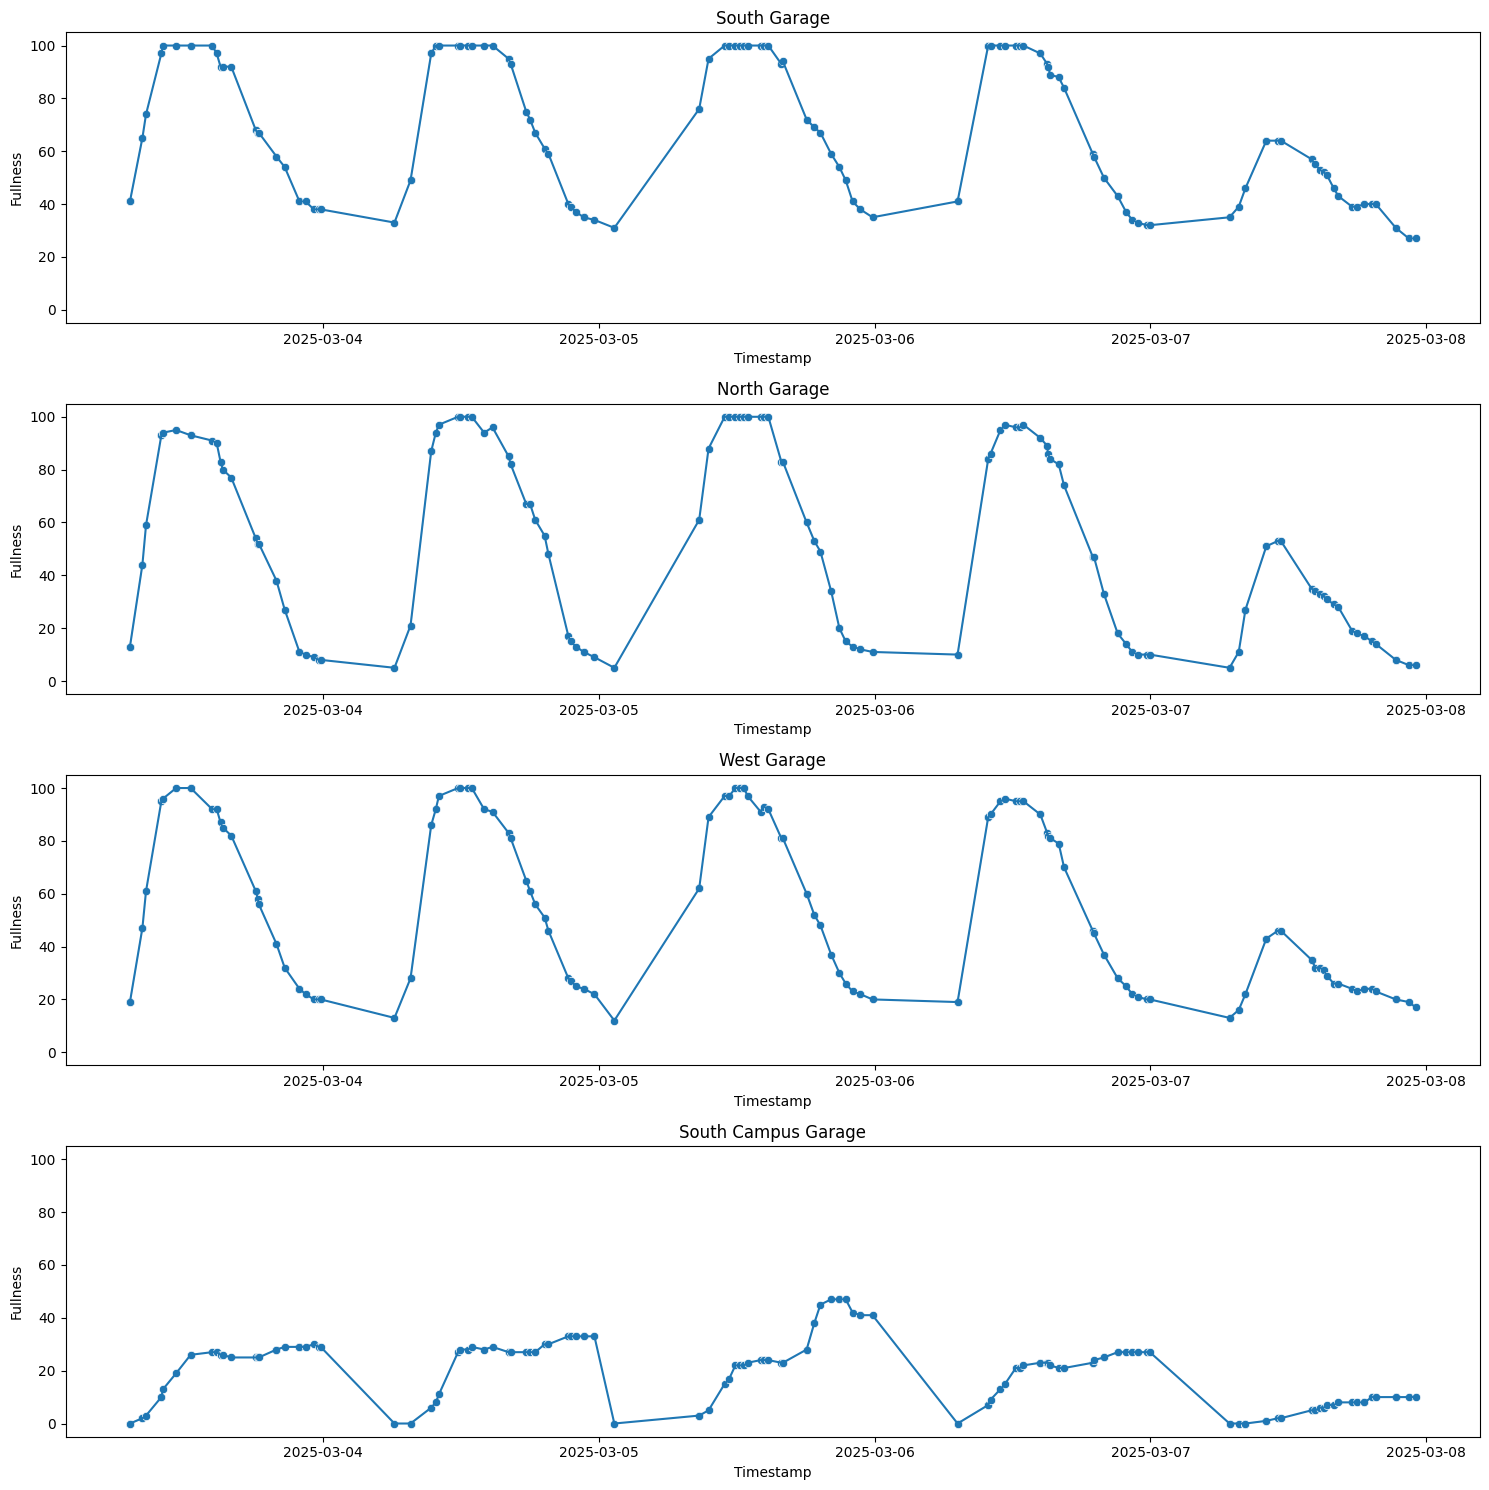

In [3]:
# seperate the data by garage
south_data = all_data[all_data['garage name'] == "South Garage"]
north_data = all_data[all_data['garage name'] == "North Garage"]
west_data = all_data[all_data['garage name'] == "West Garage"]
south_campus_data = all_data[all_data['garage name'] == "South Campus Garage"]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharey=True)

garage_data = {
    "South Garage": south_data,
    "North Garage": north_data,
    "West Garage": west_data,
    "South Campus Garage": south_campus_data
}

for ax, (garage_name, data) in zip(axes, garage_data.items()):
    filtered_data = data[(data['timestamp'] >= date_start) & (data['timestamp'] <= date_end)]
    sns.scatterplot(data=filtered_data, x='timestamp', y='fullness', ax=ax)
    sns.lineplot(data=filtered_data, x='timestamp', y='fullness', ax=ax)
    ax.set_title(f"{garage_name}")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Fullness")

plt.tight_layout()
plt.show()